Realizaremos un análisis exploratorio de un dataset llamado Titanic, que es muy usado en la industria para practicar. Este análisis es en base a una clase de un diplomado que me encuentro cursando.

1. Importamos las librerías   

In [22]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

2. Cargamos nuestro DataSet

In [2]:
excel = 'Dataset_titanic.xlsx'
df = pd.read_excel(excel)
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket       Fare Cabin Embarked  
0      0         A/5 21171       7.25   NaN        S  
1      0          PC 17599  712833.00   C85        C  
2      0  STON/O2. 3101282    7925.00   NaN        S  
3      0            113803      53.10  C123        S  
4      0            373450       8.05   NaN  

3. Realizamos un análisis exploratorio de base

Cantidad de columnas y filas

In [3]:
df.shape

(891, 12)

Nombre de las columnas

In [5]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Información de las columnas

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Suma de datos nulos

In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Descripción estadistica de los datos numéricos

In [8]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,8.910000e+02
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,1.271697e+05
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,4.112720e+05
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000e+00
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,1.445000e+01
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,7.100000e+01
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,7.895800e+04
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,5.123292e+06


Ahora mostraremos las 3 primeras filas, ultimas 3 filas y 3 filas al aleatorias

In [36]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,712833.00,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7925.00,NaN,S


In [37]:
df.tail(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [38]:
df.sample(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
696,697,0,3,"Kelly, Mr. James",male,44.0,0,0,363592,8.05,NaN,S
119,120,0,3,"Andersson, Miss. Ellis Anna Maria",female,2.0,4,2,347082,31275.00,NaN,S
395,396,0,3,"Johansson, Mr. Erik",male,22.0,0,0,350052,77958.00,NaN,S


4. Más Sobre Análisis exploratorio 

In [69]:
#Tasa de supervivencia de los pasajeros del titanic
df['Survived'].mean()

0.3838383838383838

In [70]:
#Edad promedio de los pasajeros del titanic
df['Age'].mean()

29.69911764705882

In [71]:
#Pasajeros que habían en cada clase de boleto
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [72]:
#Tasa de supervivencia de los pasajeros en cada clase de boleto
df.groupby('Pclass', as_index=False)['Survived'].mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [73]:
#Desagregando la tasa de supervivencia por genero y clase de boleto
df.groupby(['Sex','Pclass'],as_index=False)['Survived'].mean()

,Sex,Pclass,Survived
0,female,1,0.968085
1,female,2,0.921053
2,female,3,0.500000
3,male,1,0.368852
4,male,2,0.157407
5,male,3,0.135447


5. Ahora entraremos en mayor profundidad en el análisis exploratorio, es decir en el caso particular de este dataset

Veremos que podemos hacer con los datos faltantes. Tenemos varias opciones.

En el caso particular de la columna Age, vemos como se distribuyen sus datos

<AxesSubplot:>

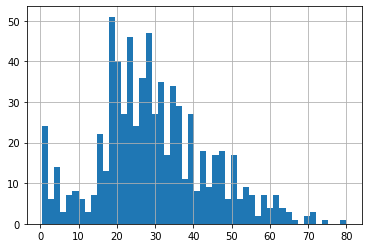

In [9]:
df['Age'].hist(bins=50)

Vemos que se distribuyen de forma mas o menos normal, por lo cual, en este caso reemplazaremos los datos con la mediana.

In [11]:
df2 = df.copy()

df2['Age'] = df2['Age'].fillna(df2['Age'].median())
df2.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Ahora en el caso de la columna Cabin, tiene muchos valores faltantes. Además hay muchas cabinas dentro del titanic, es una categoría muy atomizada, por lo cual no nos dice mucho.

Se puede hacer un esfuerzo por rescatar la columna, rellenando los datos faltantes con un valor que no se utilice en la columna como por ejemplo "Desconocidos"

In [12]:
df3 = df2.copy()

df3['Cabin']=df3['Cabin'].fillna('Desconocido')
df3.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64

Sin embargo, como mencionamos anteriormente la cabina no nos da mucha información por lo cual finalmente eliminaremos esa columna

In [14]:
df2.drop('Cabin',axis=1,inplace=True)
df2.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

Por ultimo en el Embarked vemos que solo nos faltan 2 datos, aca si podemos reemplazar esos datos faltantes. Veremos que tan atomizado esta nuestra columna.

In [15]:
df2['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

Vemos que solo tiene 3 categorías y la que más se repite o la moda es S. Por lo cual reeemplazaremos esos datos faltantes con la moda, ya que por estadistica tenemos mayor probabilidad de que esos sean los valores que correspondan a esos datos.

In [21]:
df2['Embarked']=df2['Embarked'].fillna(df2['Embarked'].mode()[0])
df2.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

6. Graficos

Histograma: Lo utilizaremos para visualizar la distribución de las edades de los pasajeros

<function matplotlib.pyplot.show(close=None, block=None)>

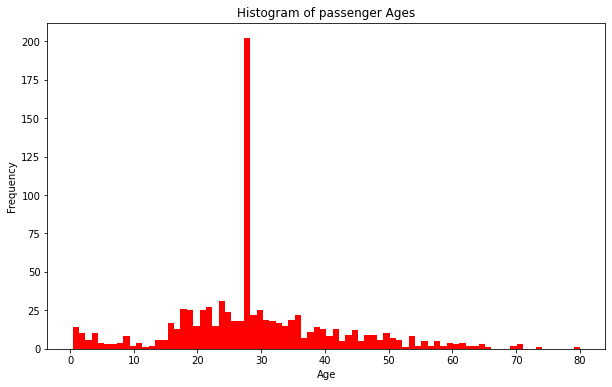

In [29]:
df2['Age'].plot(kind='hist', bins=80, figsize=[10,6], color='red')
plt.title('Histogram of passenger Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show

Boxplot: Permite visualizar la distribución de datos numéricos a través de cuartiles y detectar valores atípicos.

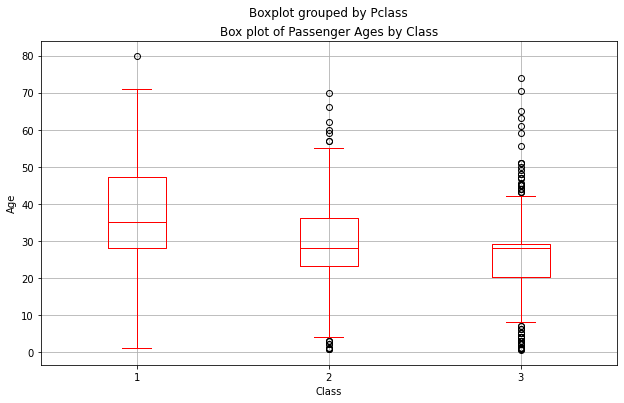

In [31]:
df2.boxplot(column='Age', by='Pclass', figsize=[10,6], color='red')
plt.title('Box plot of Passenger Ages by Class')
plt.xlabel('Class')
plt.ylabel('Age')
plt.show()

Datos anómalos o atípicos

Existen varias ténicas
- Elimnar los valores anómalos
- Imputar los valores anómalos: Reemplazarlos por la media, mediana o moda
- Transformar los datos: Por ejemplo una transformación logaritmica
- Usar técnicas estadísticas
- Mantener los valores anómalos

En este caso haremos un corte en los datos, para que la edad máxima sea de 80 años

In [34]:
df2['Age'] = df2['Age'].apply(lambda x: 80 if x>80 else x) #Aca le decimos que si x es mayor a 80, tome el valor de 80, si no, que se quede como está
df2['Age'].max()

80.0

Gráfico de disperción: Permite explorar la relación entre 2 variables numéricas.

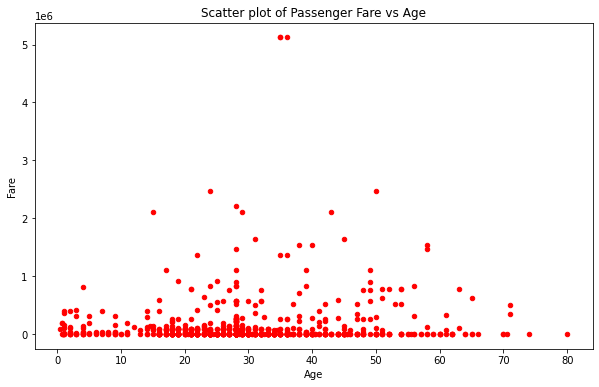

In [35]:
df2.plot(kind='scatter', x='Age', y='Fare', figsize=[10,6], c='red')
plt.title('Scatter plot of Passenger Fare vs Age')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

7. Filtro de datos: Se genera un listado con el resultado de esa comparación es decir una lista con False y True. Luego le pasamos ese listado a la tabla y nos filtrará según lo que corresponda.

In [40]:
filtro1 = df2['Age']>30 #Filtra edades mayores a 30
df2[filtro1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,712833.00,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.10,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,518625.00,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.55,S
...,...,...,...,...,...,...,...,...,...,...,...
873,874,0,3,"Vander Cruyssen, Mr. Victor",male,47.0,0,0,345765,9.00,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,831583.00,C
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,78958.00,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29125.00,Q


In [41]:
filtro2 = (df2['Pclass'] == 1) & (df2['Sex'] == 'female') #Filtra Clase 1 y mujeres
df2[filtro2]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,712833.00,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.10,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.55,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,28.0,1,0,PC 17569,1465208.00,C
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,767292.00,C
...,...,...,...,...,...,...,...,...,...,...,...
856,857,1,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.0,1,1,36928,1648667.00,S
862,863,1,1,"Swift, Mrs. Frederick Joel (Margaret Welles Ba...",female,48.0,0,0,17466,259292.00,S
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,525542.00,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,831583.00,C


In [42]:
filtro3 = df2['Embarked'].isin(['C','Q']) #Filtra donde embarcado es C o Q. ISIN signica que esten dentro
df2[filtro3]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,712833.00,C
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,84583.00,Q
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,300708.00,C
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29125.00,Q
19,20,1,3,"Masselmani, Mrs. Fatima",female,28.0,0,0,2649,7225.00,C
...,...,...,...,...,...,...,...,...,...,...,...
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7225.00,C
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,831583.00,C
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29125.00,Q
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C


8. Ordenando datos

In [44]:
df2.sort_values(by='Age', ascending=False)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.00,0,0,27042,30.00,S
851,852,0,3,"Svensson, Mr. Johan",male,74.00,0,0,347060,7775.00,S
96,97,0,1,"Goldschmidt, Mr. George B",male,71.00,0,0,PC 17754,346542.00,C
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.00,0,0,PC 17609,495042.00,C
116,117,0,3,"Connors, Mr. Patrick",male,70.50,0,0,370369,7.75,Q
...,...,...,...,...,...,...,...,...,...,...,...
831,832,1,2,"Richards, Master. George Sibley",male,0.83,1,1,29106,18.75,S
469,470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,192583.00,C
644,645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,192583.00,C
755,756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.50,S


9. Localizando datos: iloc - loc

iloc: te permite acceder a filas y columnas de un DF utilizando sus posiciones enteras.

In [45]:
df2.iloc[3] #Nos traemos la cuarta fila

PassengerId                                               4
Survived                                                  1
Pclass                                                    1
Name           Futrelle, Mrs. Jacques Heath (Lily May Peel)
Sex                                                  female
Age                                                    35.0
SibSp                                                     1
Parch                                                     0
Ticket                                               113803
Fare                                                   53.1
Embarked                                                  S
Name: 3, dtype: object

In [47]:
df2.iloc[:5,:3] #Nos traemos todas las filas hasta la 5 y todas las columnas hasta la 3

,PassengerId,Survived,Pclass
0,1,0,3
1,2,1,1
2,3,1,3
3,4,1,1
4,5,0,3


loc: Permite acceder a filas y columnas de un DF usando sus etiquetas, nombre de indice o condiciones booleanas.

In [48]:
df2.loc[5:10, ['Name','Age']] #loc nos permite colocar las columnas como nombres y no como indice

,Name,Age
5,"Moran, Mr. James",28.0
6,"McCarthy, Mr. Timothy J",54.0
7,"Palsson, Master. Gosta Leonard",2.0
8,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",27.0
9,"Nasser, Mrs. Nicholas (Adele Achem)",14.0
10,"Sandstrom, Miss. Marguerite Rut",4.0


10. Iterando datos con iterrows()

In [50]:
for index,row in df2.head().iterrows():
    print(f"Index: {index}")
    print(f"Passenger Name: {row['Name']}")
    print(f"Age: {row['Age']}")
    print(f"\n")

Index: 0
Passenger Name: Braund, Mr. Owen Harris
Age: 22.0


Index: 1
Passenger Name: Cumings, Mrs. John Bradley (Florence Briggs Thayer)
Age: 38.0


Index: 2
Passenger Name: Heikkinen, Miss. Laina
Age: 26.0


Index: 3
Passenger Name: Futrelle, Mrs. Jacques Heath (Lily May Peel)
Age: 35.0


Index: 4
Passenger Name: Allen, Mr. William Henry
Age: 35.0




11. Groupby: Permite agrupar filas de un DF en función de los valores en una o más columnas

In [51]:
#Agrupa los datos por Pclass y calcula la edad media para cada clase
df.groupby('Pclass', as_index=False)['Age'].mean()

,Pclass,Age
0,1,38.233441
1,2,29.877630
2,3,25.140620


In [52]:
#Otra forma
df.groupby('Pclass', as_index=False).agg({'Age':'mean'})

,Pclass,Age
0,1,38.233441
1,2,29.877630
2,3,25.140620


In [55]:
#Agruparemos los datos por Sexo y Clase, y calcula la tasa de supervivencia
df.groupby(['Sex','Pclass'], as_index=False).agg({'Survived':'mean'})

,Sex,Pclass,Survived
0,female,1,0.968085
1,female,2,0.921053
2,female,3,0.500000
3,male,1,0.368852
4,male,2,0.157407
5,male,3,0.135447


12. Merge: Permite combinar dos DF en función de una columna de clave común

In [56]:
#Crea una nueva caracteristica en base a la tasa de supervivencia por Pclase
nueva_caracteristica = df2.groupby('Pclass', as_index=False)['Survived'].mean()
nueva_caracteristica

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [57]:
#Renombraremos la columna Survived de la nueva caracteristica
#Antes de unirla al dataset original para que no sea confundido con la columna Survived
nueva_caracteristica = nueva_caracteristica.rename(columns={'Survived':'tasa_supervivencia'})
nueva_caracteristica

,Pclass,tasa_supervivencia
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [60]:
#Unir la nueva caracteristica al DF original
#Esto deberiamos hacerlo no con todo el dataset, solo con los datos de entrenamiento
df2 = pd.merge(df2, nueva_caracteristica, on='Pclass', how='left')
df2.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,tasa_supervivencia_x,tasa_supervivencia_y,tasa_supervivencia
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,S,0.242363,0.242363,0.242363


In [ ]:
#Aca binarizamos los generos masculinos y femeninos
df2['Sex'].replace({'male':0,'female':1},inplace=True)
df2

13. One-Hot Encodding o Variable Dummies: Es una tecnica para convertir variables categoricas en vectores binarios. Ayuda en el manejo de datos categóricos en algoritmos de aprendizaje automático que esperan una entrada numérica.

In [61]:
#Obtencion de variables Dummies para la variable Sex
var_dummies_sex = pd.get_dummies(df2['Sex'])
var_dummies_sex

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [64]:
#Concatenación de variables Dummies
df2 = pd.concat([df2, var_dummies_sex], axis=1)
df2.head(1)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,tasa_supervivencia_x,tasa_supervivencia_y,tasa_supervivencia,female,male,female,male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.25,S,0.242363,0.242363,0.242363,0,1,0,1


In [ ]:
#Descartar la variable categórica recientemente transformada
df2 = df2.drop('Sex', axis=1)
df2

14. Guardar y exportar datos

In [ ]:
#Guardando datos en un archivo CSV
df2.to_csv('titanic_df.csv', index=False)

#Guardando datos en un archivo Excel
df2.to_excel('titanic_df.xlsx', index=False)

15. Creando Set de datos de entrenamiento y prueba

In [74]:
X = df2.drop('Survived', axis=1)
y = df2['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(f"Dimension de X_train: {X_train.shape}")
print(f"Dimension de X_test: {X_test.shape}")
print(f"Dimension de y_train: {y_train.shape}")
print(f"Dimension de y_test: {y_test.shape}")

Dimension de X_train: (712, 16)
Dimension de X_test: (179, 16)
Dimension de y_train: (712,)
Dimension de y_test: (179,)
